# Day 3: ZTF Summer School

### Michael Coughlin <cough052@umn.edu>


Based on notebooks available here: https://github.com/markjay4k/fourier-transform; and with contributions totally ripped off from and Gautham Narayan (UIUC)

### Back on day 1, I claimed that we only ever measured three things in astrophysics
1. Angular separations 
2. Energy differences
3. Time differences

## What is a time-series?

We observe a source not just once, but often have several repeated observations

# $$ (t_1, m_1), (t_2, m_2), ... , (t_N, m_n) $$

A **time-series** is any sequene of observation such that the distribution of $m_k$ depends on $m_{k-1}, m_{k-2}...$.
Time is an **exogeneous** (outside the model) variable that is **directional** - measurements only depend on the past.
This is a statement of **causality**. 

Applies to astronomical measurements, your brain's electrical activity, the stock market, number of infected people...

These observations are typically not uniformly sampled - nor can they be from Earth even in principle (rotation, revolution). 

Virtually all statistical methods assume uniform sampling.  



## Why should you care?

Everything changes.

<table>
    <tr>
        <td><img src="figures/transient_sky.jpg" width=100%></td>
    </tr>
</table>

credit: Francisco Forster (ALeRCE broker team)

# What statistical questions can you ask of a time-series?


<table>
    <tr>
        <td><img src="figures/cow.png" width=100%></td>
    </tr>
</table>

## What jumps out at you? Speculate as to why. How might you model this?

What you are doing is a combination of **trend detection**, **forecasting**, and **period finding** 

# In-class Exercise: What statistical questions can you ask of a time-series


<table>
    <tr>
        <td><img src="figures/tsunami.jpg" width=100%></td>
    </tr>
</table>

## When did the earthquake begin and end? When did the main shocks of the Boxing Day Tsunami happen? How far apart are they?

What you are doing is a combination of **event finding** and **change point detection**. 

## What statistical questions can you ask of a time-series

1. Trend detection
2. Periodicity detection
3. Event detection
4. Point of change detection
5. Forecasting

All of which are linked to each other. Note that none of these datasets are astronomical.

## You've already seen datasets with periodic behavior in astrophysics.

<img src="figures/flare.png" style="float: left; width: 30%; margin-right: 1%;"> <img src="figures/cepheid.png" style="float: left; width: 30%; margin-right: 1%;"> <img src="figures/eclipsing.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;">

# Fourier Series and Fourier Transform

We can approximate a periodic function of period P to arbitrary accuracy by adding sine and cosine terms. This process is known as a Fourier Series, computed as

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(nx) + b_n \sin(nx)
$$

### Let's look at the square wave centered at $x=0$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
pi = np.pi
x = np.linspace(-3*pi, 3*pi, 1000)

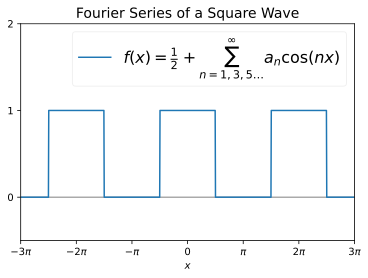

In [2]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 0.5 + 0.5 * signal.square(x + pi/2), lw=1.5, 
         label=r'$f(x)=\frac{1}{2} + \sum_{n=1,3,5\ldots}^{\infty}a_n \cos(nx)$')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks([-3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi], ['$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$'])
plt.xlim(-3*pi, 3*pi)
plt.ylim(-0.5, 2)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.rcParams['figure.figsize'] = (11, 4)
plt.rcParams.update({'font.size': 16})
plt.title('Fourier Series of a Square Wave', fontsize=14)
plt.xlabel('$x$')
plt.show()

### But we didn't show how to calculate $a_n$

### Let's change our Fourier Series Equation

$$
f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} a_n \cos(n \omega_0 x) + b_n \sin(n \omega_o x)
$$

### where

$$
\omega_0 =\frac{2\pi}{T}
$$

### and $T$ is the fundamental period (for the square wave above, $T=2\pi$)

### The equation for $a_n$ is
$$
a_n = \frac{2}{T}\int_{-T/2}^{T/2} f(x)\cos(n \omega_0 x)dx
$$

### For the square wave above, the limits are only $-T/4$ to $T/4$ because $f(x)=0$ for the rest of the wavelength.

$$
a_n = \frac{2}{T} \int_{-T/4}^{T/4}\cos(n \omega_0 x)dx
$$

### Because $\cos(nx)$ is even, we can reduce the limits to $0$ to $T/4$ and multiply by $2$

$$
a_n = \frac{4}{T} \int_{0}^{T/4}\cos(n \omega_0 x)dx
$$

$$
a_n = \frac{4}{n \omega_0 T} \sin(n \omega_0 x)\bigg|^{T/4}_0  =\frac{4}{n \omega_0 T}\sin \left( n\omega_0 \frac{T}{4} \right)
$$

$$
a_n =\frac{2}{n\pi}\sin \left(n \omega_0 \frac{\pi}{2} \right)
$$

### And of course we can plot this

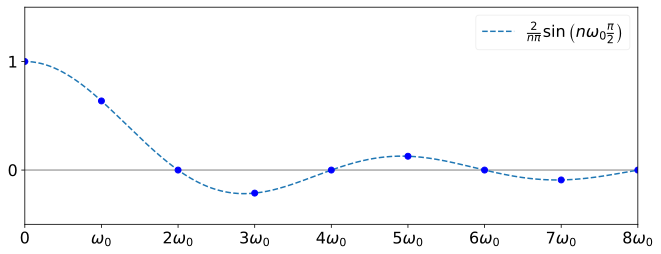

In [3]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--', label=r'$\frac{2}{n\pi}\sin \left( n\omega_0 \frac{\pi}{2} \right)$')
an = [2/(n*pi) * np.sin(n * pi/2) for n in range(1, 10)]
plt.plot(0, 1, 'bo')
plt.plot(range(1, 10), an, 'bo')
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

# In-class warm-up: What if we make the squares farther apart by making $T=4\pi$ ?

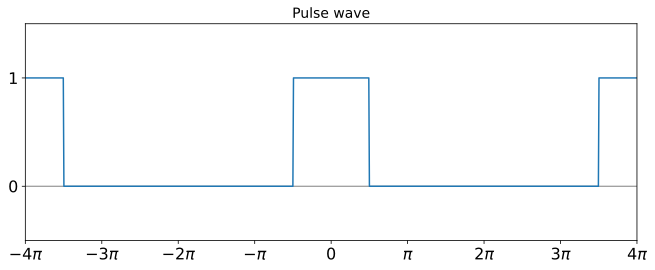

In [4]:
plt.axhline(0, color='gray', lw=1)
x = np.linspace(-4*pi, 4*pi, 1000)
f = (0.5 + 0.5 * signal.square(x + pi/2)) * (0.5 + 0.5 * signal.square(x/2 + pi/2))
plt.plot(x, f, lw=1.5)
plt.yticks([-1, 0, 1], ['$-1$', '$0$', '$1$'])
plt.xticks([-4*pi, -3*pi, -2*pi, -1*pi, 0, pi, 2*pi, 3*pi, 4*pi],
          ['$-4\pi$', '$-3\pi$', '$-2\pi$', '$-\pi$', '$0$', '$\pi$', '$2\pi$', '$3\pi$', '$4\pi$'])
plt.rcParams.update({'font.size': 16})
plt.xlim(-4*pi, 4*pi)
plt.ylim(-0.5, 1.5)
plt.rcParams['figure.figsize'] = (11, 4)
plt.title('Pulse wave', fontsize=14)
plt.show()

### What are the new $a_n$ coefficients?

Remember to use markdown to render your equations!

The new fundamental frequency becomes $\omega'_0 =\omega_0/2$ 

$$
a_n = \frac{4}{n\omega'_0 T} \sin \left(n\omega'_0\frac{T}{8}\right)
$$

$$
a_n = \frac{2}{n\pi} \sin \left(n \omega'_0 \frac{\pi}{2} \right)
$$

### Make a plot of your new coefficients

What do you notice about the spacing of the coefficients? And their amplitudes?

Since the fundamental frequency is cut in half, the spacing between coefficients are closer, but bound by the same envelope

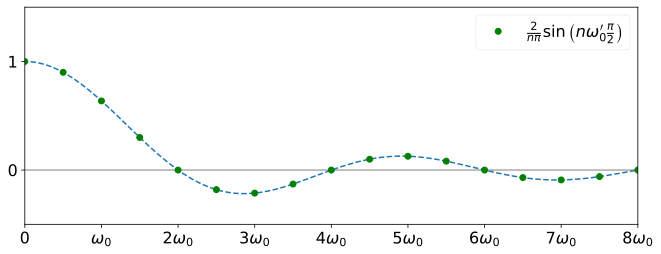

In [5]:
plt.axhline(0, color='gray', lw=1)
plt.plot(x, 2/(x*pi) * np.sin(x * pi/2), '--')
nprime = np.arange(0.5, 10, 0.5)
an2 = [2/(n*pi) * np.sin(n * pi/2) for n in nprime]
plt.plot(0, 1, 'go')
plt.plot(nprime, an2, 'go', label=r"$\frac{2}{n\pi}\sin \left( n\omega_0' \frac{\pi}{2} \right)$")
plt.yticks([-1, 0, 1, 2], ['$-1$', '$0$', '$1$', '$2$'])
plt.xticks(list(range(9)),
          ['$0$', '$\omega_0$', '$2\omega_0$', '$3\omega_0$', '$4\omega_0$', 
           '$5\omega_0$', '$6\omega_0$', '$7\omega_0$', '$8\omega_0$'])
plt.xlim(0, 8)
plt.ylim(-0.5, 1.5)
plt.legend(fontsize=16, fancybox=True, framealpha=0.3, loc='best')
plt.show()

### And of course we can animate this process to see how it performs in general

In [6]:
import numpy as np

def rect(x, B):
    """
    create a rectangle function
    returns a numpy array that is 1 if |x| < w and 0 if |x| > w
    B is the rectangle width centered at 0
    x is the number of points in the array
    """
    
    B = int(B)
    x = int(x)
    
    high = np.ones(B)
    low1 = np.zeros(int(x/2 - B/2))    
    x1 = np.append(low1, high)
    rect = np.append(x1, low1)
    
    if x > len(rect):
        rect = np.append(rect, 0)
    elif x < len(rect):
        rect = rect[:-1]

    return rect

<IPython.core.display.Javascript object>


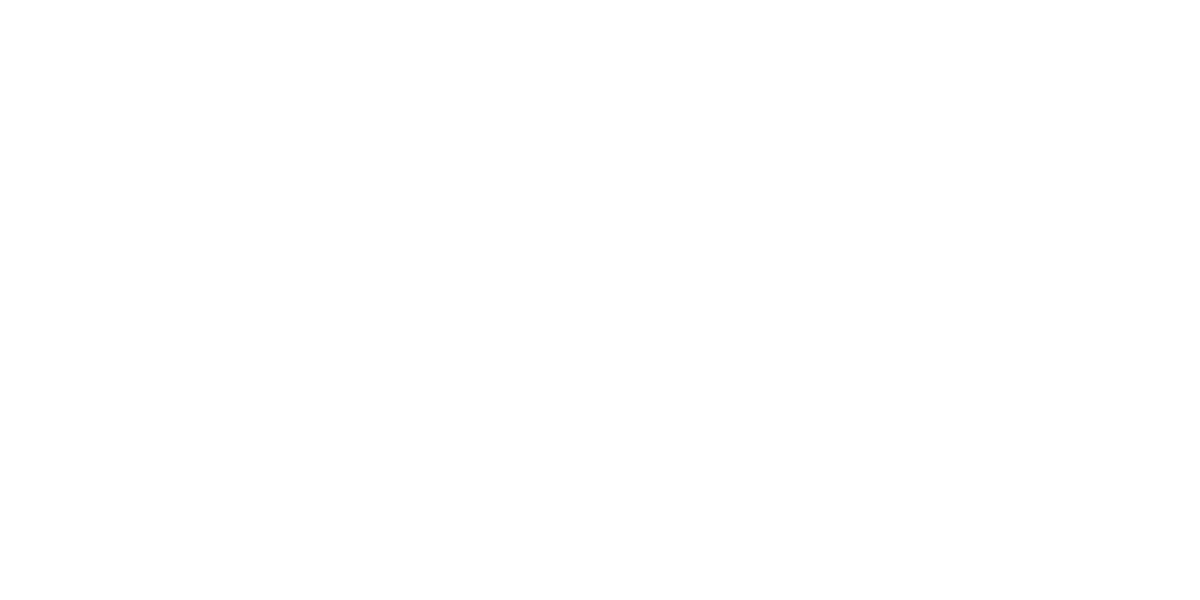

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# constants and x array
pi = np.pi
length = 2000
x = np.linspace(-1, 1, length)

# create figure and axes 
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6))

# creating our line objects for the plots
sinc, = ax1.plot(x, np.sin(x), '-b')
box, = ax2.plot(x, np.sin(x), '-r')

def animate(B):
    """
    this function gets called by FuncAnimation
    each time called, it will replot with a different width "B"
    
    B: rect width
    
    return:
        sinc: ydata
        box: ydata
    """
    
    # create our rect object
    f = rect(len(x), B)
    box.set_ydata(f)
    
    # create our sinc object
    F = (B / length) * np.sin(x * B / 2) / (x * B / 2)
    sinc.set_ydata(F)
    
    # adjust the sinc plot height in a loop
    ax1.set_ylim(np.min(F), np.max(F))
    
    # format the ax1 yticks
    plt.setp(ax1, xticks=[-0.25, 0.25], xticklabels=['-1/4', '1/4'],
             yticks=[0, np.max(F)], yticklabels=['0', 'B={:.2f}'.format((B / length))])
    
    # format the ax2 xticks to move with the box
    plt.setp(ax2, yticks=[0, 1], 
             xticks=[-1, -1 * B / length, 1 * B / length, 1], xticklabels=['-1', '-B/2', 'B/2', '1'])
    
def init():
    """
    initialize the figure
    """
    
    ax2.set_ylim(-0.2, 1.1)
    ax1.set_xlim(-0.25, 0.25)
    ax2.set_xlim(-1, 1)
    ax1.axhline(0, color='black', lw=1)
    ax2.axhline(0, color='black', lw=1)
    plt.rcParams.update({'font.size':14})
    
    return sinc, box,

# the FuncAnimation function iterates through our animate function using the steps array
step = 10
steps = np.append(np.arange(10, 1000, step), np.arange(1000, 10, -1 * step))
ani = FuncAnimation(fig, animate, steps, init_func=init, interval=50, blit=True)
plt.show()

# Fourier Transform

1. Fourier Transform is a generalized version of the Fourier Series
2. It applies to both period and non periodic functions 
   - For periodic functions, the spectrum is discrete
   - For non-period functions, the spectrum is continuous 

The Fourier Transform by itself can be powerful if 
1. the signal-to-noise is high
2. the signal is continious and uniformly sampled 
3. the shape you are modeling is simple and can be decomposed into a few Fourier terms.

Unfortunately, these are not the usual conditions we have when taking data. We will look at this case next time.

### The Fourier Series becomes the Fourier Transform when
$$
T \rightarrow \infty, \qquad \omega_0 \rightarrow 0
$$

### Definitions

#### Fourier Transform

Fourier Transform of $f(x)$ is $F(k)$
$$
F(k) = \mathcal{FT}\{f(x)\}
$$

$$
F(k) = \int_{-\infty}^{\infty}f(x) \exp(-ikx)dx
$$

where $k=\frac{2\pi}{x}$ is called the "wavenumber"

#### Inverse Fourier Transform

To go back to $f(x)$, the formula is

$$
f(x) = \mathcal{FT}^{-1}\{F(k)\}
$$

$$
f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty}F(k) \exp(ikx)dx
$$

Since $x$ and $k$ are inversely proportional, the "size" of $f(x)$ and $F(k)$ are inversely proportional. 
What this means is, 
 - a compact $f(x)$ will have a broad spectrum.
 - a broad $f(x)$ will have a compact spectrum

### Rectangle function

The $rext_B(x)$ function is a rectangle centered at $x=0$ with $\text{Height}=1$ and $\text{Width}=B$. The Formula can be written as 

$$
\text{rect}_B(x) =
\begin{cases}
0 & \text{if} \,\,\, |x| > B/2\\[2pt]
1/2 & \text{if} \,\,\, |x| = B/2 \\[2pt]
1 & \text{if} \,\,\, |x| < B/2
\end{cases}
$$

The cell below is a simple function for creating $\text{rect}_B(x)$

### Example Fourier Transform of $\text{rect}$ function

Using the FT definition and the $\text{rect}_B(x)$ equation, the FT is

$$
F(k) = \int_{-B/2}^{B/2} \exp(-ikx)dx
$$

$$
= -\frac{1}{ik} \exp(-ikx) \, \Big|_{-B/2}^{\,B/2}
$$

$$
= -\frac{1}{ik} \left[ \exp(-ikB/2) - \exp(ikB/2)\right]
$$

Using the complex definition of sine from Euler's formula

$$
\sin(x) = \frac{e^{ix} - e^{-ix}}{2i}
$$

Our equation for $F(k)$ can be re-written as 

$$
F(k) = \frac{2}{k}\frac{\exp(ikB/2) - \exp(-ikB/2)}{2i}
$$

$$
= \frac{2}{k} \sin(kB/2)
$$

$$
= B \frac{\sin(kB/2)}{kB/2}
$$


$$
F(k) = B \text{sinc}(kB/2)
$$

# Example Fourier Transform from the scipy docs: FFT of the sum of two sines.

<IPython.core.display.Javascript object>


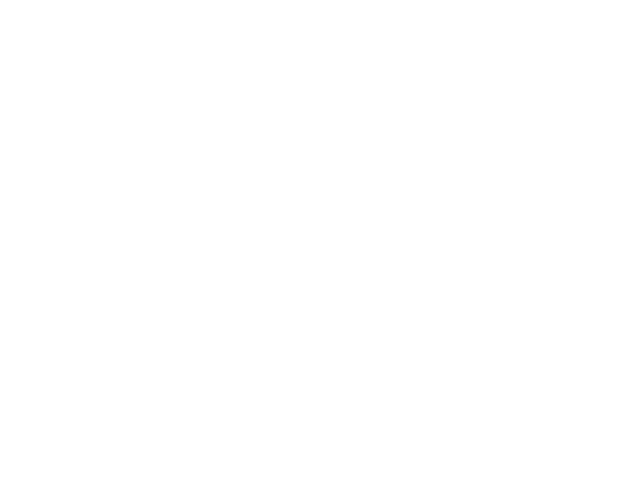

In [8]:
from scipy.fft import fft, fftfreq
from scipy.signal import blackman

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

xf = fftfreq(N, T)[:N//2]

plt.figure()
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.grid()
plt.show()

# In-class warm-up: windowing functions

Notice from the above, there is power at frequencies other than the ones we injected in the original time-series. This arises due to the use of finite data sets; this is a common occurance as we might be interested in their spectral content only during a certain time period. 

To address this, the Fourier transform is **usually** applied to the product of the waveform and a window function. Any window (including rectangular) affects the spectral estimate computed by this method.We will look at windowing functions to remove the long tail of power outside of our frequencies. Look here: https://docs.scipy.org/doc/scipy/reference/signal.windows.html for possible window functions.

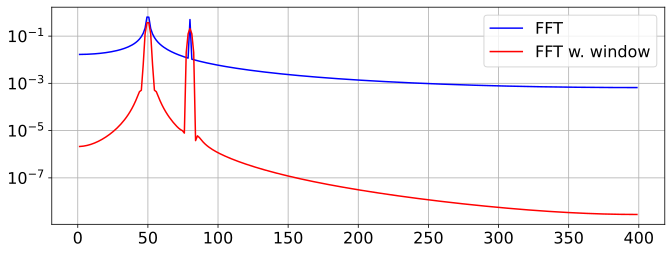

In [6]:
from scipy.fft import fft, fftfreq

# Import one of the window functions from above
from scipy.signal import blackman

# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)

# create window same length as the signal
w = blackman(N)
# multiply time-series by window function and take FFT
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]

# compare the resulting Fourier transforms
plt.figure()
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

# Nyquist Sampling

Nyquist: "In order to recover all Fourier components of a periodic waveform, it is necessary to use a sampling rate fs at least twice the highest waveform frequency"

The above statement requires the user to sample a signal at twice the highest natural frequency of the expected system, or mathematically:

$\large f_{Nyq} = 2\cdot f_{natural}$

Therefore, in the FFT function, the limitation of the frequency component is set by the sample rate, which is typically a little higher than twice the highest natural frequency expected in the system. In the case of acoustics, the sample rates are set at approximately twice the highest frequency that humans are capable of discerning (20 kHz), so the sample rate for audio is at minimum 40 kHz. We often see 44.1 kHz or 48 kHz, which means audio is often sampled correctly above the Nyquist frequency set by the range of the human ear. 

Therefore, in practice, it is essential to adhere to the following inequality:
$\large f_{Nyq} = 2\cdot f_{natural} \rightarrow f_s \geq f_{Nyq}$

As a visualization tool, below I have plotted several sampled signals that are sampled around the Nyquist frequency for a sine wave.

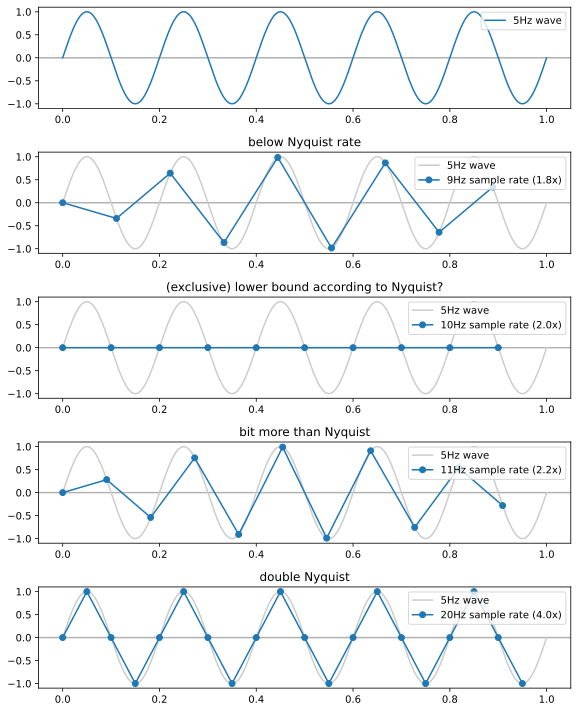

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

wave_freq = 5
domain = 1
# Number of sample points
N = 10000

sample_rates = (
    (wave_freq * 2 - 1, 'below Nyquist rate'),
    (wave_freq * 2, '(exclusive) lower bound according to Nyquist?'),
    (wave_freq * 2 + 1, 'bit more than Nyquist'),
    (wave_freq * 4, 'double Nyquist'),
)

n_plots = len(sample_rates) + 1

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(n_plots, 1,  1)

x_hi_res = np.linspace(0.0, domain, N, endpoint=False)
hi_res = np.sin(wave_freq * 2.0*np.pi*x_hi_res)
ax.axhline(color="0.7")
ax.plot(x_hi_res, hi_res, label=f'{wave_freq}Hz wave')
ax.legend(loc=1)
ylim = ax.get_ylim()

for i, (sample_rate, title) in enumerate(sample_rates):
    ax = fig.add_subplot(n_plots, 1, i+2)

    x = np.linspace(0.0, domain, sample_rate, endpoint=False)
    samples = np.sin((2 * np.pi * wave_freq) * x)
    ax.axhline(color="0.7")
    ax.plot(x_hi_res, hi_res, label=f'{wave_freq}Hz wave', color='0.8') # show what we're aiming for
    ax.plot(x, samples, marker='o', label=f'{sample_rate}Hz sample rate ({sample_rate/wave_freq}x)')
    ax.set_ylim(*ylim)
    ax.legend(loc=1)
    ax.set_title(title)
    
fig.tight_layout()

# In-class Exercise: plot the Fourier transforms of the sine waves with different sample rates.

No handles with labels found to put in legend.


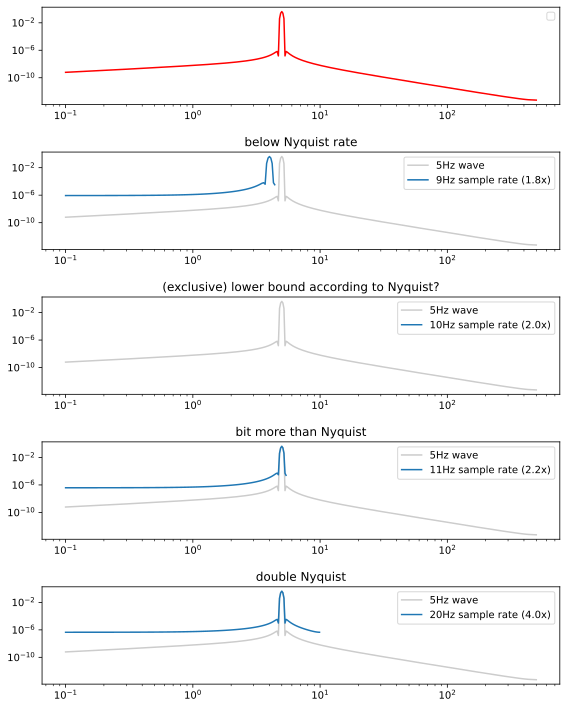

In [8]:
# YOUR CODE HERE
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import blackman

wave_freq = 5
domain = 10
# Number of sample points
N = 10000

sample_rates = (
    (wave_freq * 2 - 1, 'below Nyquist rate'),
    (wave_freq * 2, '(exclusive) lower bound according to Nyquist?'),
    (wave_freq * 2 + 1, 'bit more than Nyquist'),
    (wave_freq * 4, 'double Nyquist'),
)

n_plots = len(sample_rates) + 1

fig = plt.figure(figsize=(8, 10))
ax = fig.add_subplot(n_plots, 1,  1)

x_hi_res = np.linspace(0.0, domain, N, endpoint=False)
hi_res = np.sin(wave_freq * 2.0*np.pi*x_hi_res)

# sample spacing
T = x_hi_res[1] - x_hi_res[0]

# create window same length as the signal
w = blackman(N)
# multiply time-series by window function and take FFT
ywf_hi_res = fft(hi_res*w)
xf_hi_res = fftfreq(N, T)[:N//2]

plt.loglog(xf_hi_res[1:N//2], 2.0/N * np.abs(ywf_hi_res[1:N//2]), '-r')
ax.legend(loc=1)
ylim = ax.get_ylim()

for i, (sample_rate, title) in enumerate(sample_rates):
    ax = fig.add_subplot(n_plots, 1, i+2)

    x = np.linspace(0.0, domain, sample_rate*domain, endpoint=False)
    T = x[1] - x[0]
    samples = np.sin((2 * np.pi * wave_freq) * x)
    N2 = len(x)
    
    # create window same length as the signal
    w = blackman(N2)
    # multiply time-series by window function and take FFT
    ywf = fft(samples*w)
    xf = fftfreq(N2, T)[:N//2]

    plt.loglog(xf_hi_res[1:N//2], 2.0/N * np.abs(ywf_hi_res[1:N//2]), label=f'{wave_freq}Hz wave', color='0.8') # show what we're aiming for
    plt.loglog(xf[1:N2//2], 2.0/N2 * np.abs(ywf[1:N2//2]), label=f'{sample_rate}Hz sample rate ({sample_rate/wave_freq}x)')
    
    ax.axhline(color="0.7")
    ax.set_ylim(*ylim)
    ax.legend(loc=1)
    ax.set_title(title)
    
fig.tight_layout()

# In-class Exercise: Fourier Transform of RR-Lyrae

How many frequencies do you need to reproduce the time-series?

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import astroML.datasets.rrlyrae_templates
from astroML.datasets import fetch_rrlyrae_templates

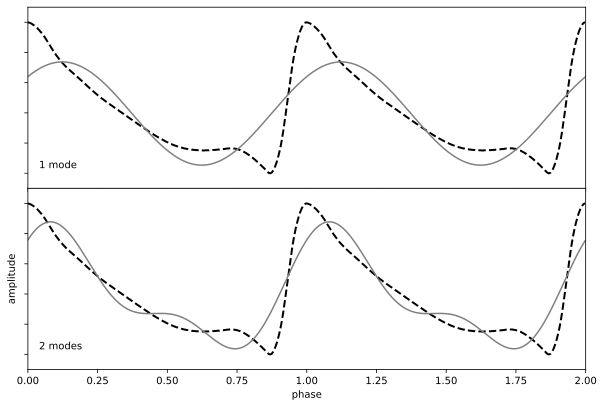

In [10]:
# RUN THIS

# Load the RR Lyrae template
templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T

# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0)

# TEST MODES HERE
kvals = [1, 2]
subplots = [311, 312]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)

    # Use FFT to fit a truncated Fourier series
    # reconstruct using k frequencies
    y_fft = np.fft.fft(y) # compute FFT
    y_fft[k + 1:-k] = 0 # zero-out frequencies higher than k
    y_fit = np.fft.ifft(y_fft).real # reconstruct using k modes

    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y, y]), '--k', lw=2)
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y_fit, y_fit]), color='gray')

    label = "%i mode" % k
    if k > 1:
        label += 's'

    ax.text(0.02, 0.1, label, ha='left', va='bottom',
            transform=ax.transAxes)

    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

fig = plt.gcf()
plt.show()

# In-Class Exercise Convolutions

The <a href="https://en.wikipedia.org/wiki/Convolution">convolution</a> of two discretely sampled (with $N$ samples) functions $f_i$ and $g_i$ is defined as $$(f * g)_k = \sum_{i=0}^{N-1} f_k g_{i-k}$$.

In other words, to calcuate the convolution: (1) multiply two functions and sum them to get a number and (2) repeat the procedure for all possible offsets.

### Compute the convolution of a Gaussian with two delta functions below and plot the Gaussian, delta functions, and convolution you measure.

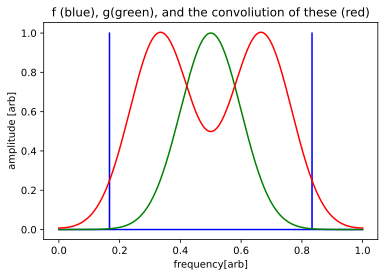

In [14]:
from scipy.stats import chi2, norm
import numpy as np
t = np.linspace(0,1,N)
f = np.zeros(N)
f[int(N/6)] = 1.
f[int(N*5/6)] = 1.
g = norm.pdf(np.real(t),0.5,0.1)
g = g/np.max(g)

# YOUR CODE HERE

def convolution(f,g):
    g=g[::-1]
    N = np.size(f)
    conv = np.zeros(N)
    
    i = 0
    while (i <N):
        conv[i] = np.sum(f *np.roll(g,i))
        i+=1
    return(conv)

conv = convolution(f,g)

plt.plot(t,f,'b')
plt.plot(t,g,'g')
plt.plot(t,conv,'r')
#plt.axis([np.min(t),np.max(t),0,1.2])

plt.xlabel("frequency[arb]")
plt.ylabel("amplitude [arb]")
plt.title("f (blue), g(green), and the convoliution of these (red)")
plt.show()

You will note that since the green Gaussian curve is centered between the delta functions, the convolution peaks at points when the offsets center the Gaussian on the blue delta functions.  For our applications, we often want to center the results such that the convolutoin peaks on the delta functions.  To do this, we must center the convolving kernal (the Gaussian in this example) at "zero frequency." Following the convention in our FFT, this is the left edge of the array.

### Shift the Gaussian such that it centers around 0, and show that the convolution peaks at the delta functions

Note: given how common the need to center convolutions this way is, numpy has an "fftshift" function built in to do this.

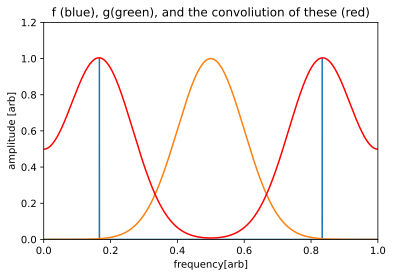

In [15]:
conv = convolution(f,np.roll(g,int(N/2)))

plt.plot(t,f)
plt.plot(t,g)
plt.plot(t,conv,"r")
plt.axis([np.min(t),np.max(t),0,1.2])

plt.xlabel("frequency[arb]")
plt.ylabel("amplitude [arb]")
plt.title("f (blue), g(green), and the convoliution of these (red)")
plt.show()

Speed is a big issue in convolutions.  Coneveniently there is a way to massively accelerate this algorithm using the FFT with the convolition theorem:
$$(f * g) = iFFT(FFT(f) * FFT(g)). $$
In other words the convoluiton is the inverse fourier transform of the product of the fourier transform of the two funtions.

### Use the convolution theorem and your Fourier transform and inverse Fourier Transform functions to find the same result as in 2b

/home/mcoughlin/anaconda3/envs/ztfsummer/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


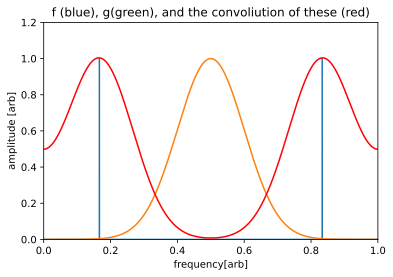

In [16]:
def fft_convolve(f,g):
    
    FFTf = np.fft.fft(f)
    FFTg = np.fft.fft(g)
    conv = np.fft.ifft(FFTf*FFTg)
    return conv

conv = fft_convolve(f,np.roll(g,int(N/2)))


plt.plot(t,f)
plt.plot(t,g)
plt.plot(t,conv,"r")
plt.axis([np.min(t),np.max(t),0,1.2])

plt.xlabel("frequency[arb]")
plt.ylabel("amplitude [arb]")
plt.title("f (blue), g(green), and the convoliution of these (red)")
plt.show()

As expected the results are the same for this method as for the direct method.

The Fourier Transform by itself can be powerful if 
1. the signal-to-noise is high
2. the signal is continious and uniformly sampled 
3. the shape you are modeling is simple and can be decomposed into a few Fourier terms.

Unfortunately, these are not the usual conditions we have when taking data. We will look at this case next time.

The figure on the left is the kind of data that you **want** to have, whereas the figure on the right is the kind of data that you are more likely to actually have.
<img src="figures/rrlyrae-good.png" style="float: left; width: 40%; margin-right: 1%;"> <img src="figures/rrlyrae-bad.png" style="float: left; width: 40%; margin-right: 1%;">

### Properties of light-curves
* Gappy
* Irregular
* Heteroskedastic (the variance tends to vary with source brightness, for example)

### Reasons
* expense, rotation/revolution of Earth, moon
* science objectives, weather, moon
* weather, moon, airmass

## What can we do with light-curves?
* Abstract them through generic statistical measures
* Use domain knowledge to look for characteristics
* See if they are periodic

## Statistical Features

* Compute features (statistical measures) for each light curve: amplitudes, moments, periodicity, etc.
* Converts heterogeneous light curves into homogeneous feature vectors in the parameter space
* Apply a variety of automated classification methods

# The Periodogram

What we want to be able to do is to detect variability and measure the period in the face of both noisy and incomplete data. Instead we'll use Fourier decomposition to get a more useful tool for actual data analysis.


or a periodic signal we have:

$$y(t+P)=y(t),$$ where $P$ is the period.

We can create a *phased light curve* that plots the data as function of phase:
$$\phi=\frac{t}{P} − {\rm int}\left(\frac{t}{P}\right),$$

where ${\rm int}(x)$ returns the integer part of $x$.

### A Single Sinusoid

Let's take the case where the data are drawn from a single sinusoidal signal:

# $$y(t)=A \sin(\omega t+\phi)+\epsilon$$

and determine whether or not the data are indeed consistent with periodic variability and, if so, what is the period.


This model is annoying to work with because it's **non-linear** in the frequency term, $\omega$ and the phase, $\phi$

We can rewrite the argument as $\omega(t−t_0)$ (reexpressing the phase term) and use trig identies to rewrite the model as: 

# $$y(t)=a \sin(\omega t)+b \cos(\omega t)$$

where 

# $$A=(a^2+b^2)^{1/2} \text{ and } \phi=\tan^{−1}(b/a)$$

The model is now linear with respect to coefficients $a$ and $b$ (and nonlinear only with respect to frequency, $\omega$). So we got rid of one of the two non-linear parameters!

It turns out, if we know the noise $\sigma$ then 

# $$   p(\omega|\{t,y\}, \sigma) \propto \exp \left( { P(\omega) \over \sigma^2} \right)$$

giving us the posterior for $\omega$! 

$P(\omega)$ is the [periodogram](https://en.wikipedia.org/wiki/Periodogram), which is just a plot of the "power" at each possible period

So the process is similar to what we did with maximum likelihood estimation
1. Get some data
2. Make a uniform grid in period
3. Evaluate the likelihood/the periodogram power at each period 
4. Identify the period with the maximum power

<img src="figures/periodogram.png">

### Significance of the peaks in the periodogram

The amplitude(s) of the periodic signal can be derived from the posterior in much the same way as we do for MLE i.e. take the derivative of the posterior with respect to $a$ and $b$, equate to 0 and find where the maximum is.

But what we really want to know is the "best value" $\omega$? 

The $\chi^2$ is given by
$$\chi^2(\omega) \equiv {1 \over \sigma^2} \sum_{j=1}^N [y_j-y(t_j)]^2 =
  {1 \over \sigma^2} \sum_{j=1}^N [y_j- a_0\, \sin(\omega t_j) - b_0 \, \cos(\omega t_j)]^2$$
  
which we can simplify to

$$\chi^2(\omega) =  \chi_0^2 \, \left[1 - {2 \over N \, V}  \, P(\omega) \right]$$

where, again, $P(\omega)$ is the periodogram and $\chi_0^2$ is the $\chi^2$ for a model with $y(t)$=constant:

$$  \chi_0^2 = {1 \over \sigma^2} \sum_{j=1}^N y_j^2 = {N \, V \over \sigma^2}$$

We'll now renormalise the periodogram, defining the [Lomb-Scargle periodogram](https://en.wikipedia.org/wiki/Least-squares_spectral_analysis#The_Lomb.E2.80.93Scargle_periodogram) as

$$P_{\rm LS}(\omega) = \frac{2}{N V} P(\omega),$$  where $0 \le P_{\rm LS}(\omega) \le 1$.

With this renormalization, the reduction in $\chi^2(\omega)$ for the harmonic model, 
relative to $\chi^2$ for the pure noise model, $\chi^2_0$ is
$${\chi^2(\omega) \over \chi^2_0}=  1 - P_{LS}(\omega).$$

To determine if our source is variable or not, we first compute $P_{\rm LS}(\omega)$ and then model the odds ratio for our variability model vs. a no-variability model.

If our variability model is "correct", then the peak of $P(\omega)$ [found by grid search] gives the best $\omega$ and the $\chi^2$ at $\omega = \omega_0$ is $N$.

If the true frequency is $\omega_0$ then the maximum peak in the periodogram should have a height

$$P(\omega_0) = {N \over 4} (a_0^2 + b_0^2)$$

and standard deviation
$$      \sigma_P(\omega_0)  = {\sqrt{2} \over 2} \, \sigma^2.$$


# Properties of LS and the periodogram

- The expected heights of the peaks in a periodogram don't depend on $\sigma$ but their variation in height do.
- For $P_{\rm LS}(\omega_0)$, with no noise the peak approaches 1. As noise increases, $P_{\rm LS}(\omega_0)$ decreases and is ``buried'' in the background  noise.
- Our derivation worked for mean = 0, and data in a single channel/passband
    - Extensions of Lomb-Scargle to multiple passbands and to handle a floating mean + many numerical approximations
    
## [Jake VanDerPlas has a good writeup on understanding the periodogram](https://arxiv.org/abs/1703.09824)

# What the periodogram is good for and what it isn't

Pros:
- Works with unevenly sampled data, and binning in phase helps build statistics even with noisy data

Cons:
- ANY PERIODIC SIGNAL IN THE DATA WILL EXHIBIT SOME POWER
    - This includes aliases of the true period
- Multiband extension requires  that the period/frequency is the same across all channels/passbands 
    - this is not the case for many time-series phenomena


<img src="figures/Sun-Wavelength-Chart.jpg">



# In-class warm-up: Finding the Period of a Variable Star

If you don't already have gatspy, you'll want it:

> `conda install gatspy`

There are alternatives but it is one of the best for CPU-based Lomb-Scargle.

There is some data in a file below.

1. Plot it up to see what it looks like
2. Use the Lomb-Scargle Multiband to construct a periodogram on a grid of a 1000 periods
3. Plot the folded light curve for the best-guess period

In [18]:
# RUN THIS
%matplotlib inline
import astropy.table as at
import matplotlib.pyplot as plt
import numpy as np
from gatspy.periodic import LombScargleMultiband

data = at.Table.read('data/1938779.dat', format='ascii')

t     = data['HJD']
y     = data['MAG']
dy    = data['MAGERR']
filts = data['FILTS']

data

HJD,MAG,MAGERR,CONTAM,SKYLO,SKYHI,BLIM,TYPE,CHIP,XP,YP,FILTS
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1
56423.713908,19.136,0.02,0.0,22.19,30.6,0.088,1.0,4.0,163.44,1993.44,u
56423.862091,19.07,0.016,0.0,22.93,31.95,0.085,1.0,4.0,70.75,2060.01,u
56424.694922,19.209,0.021,0.0,19.38,28.98,0.089,1.0,4.0,147.53,2012.44,u
56424.77499,18.982,0.019,0.0,42.83,68.57,0.089,1.0,4.0,116.54,2031.77,u
56424.86045,19.054,0.015,0.0,39.22,57.04,0.079,1.0,4.0,132.58,2006.13,u
56450.659293,19.255,0.017,0.0,18.3,26.51,0.087,1.0,4.0,250.52,1937.43,u
56450.785196,18.935,0.017,0.0,21.16,30.51,0.082,1.0,4.0,193.17,1973.04,u
56450.883668,19.197,0.019,0.0,26.06,35.37,0.087,1.0,4.0,203.26,1970.1,u
56450.936075,19.248,0.022,0.0,46.57,56.34,0.096,1.0,4.0,206.95,1993.73,u


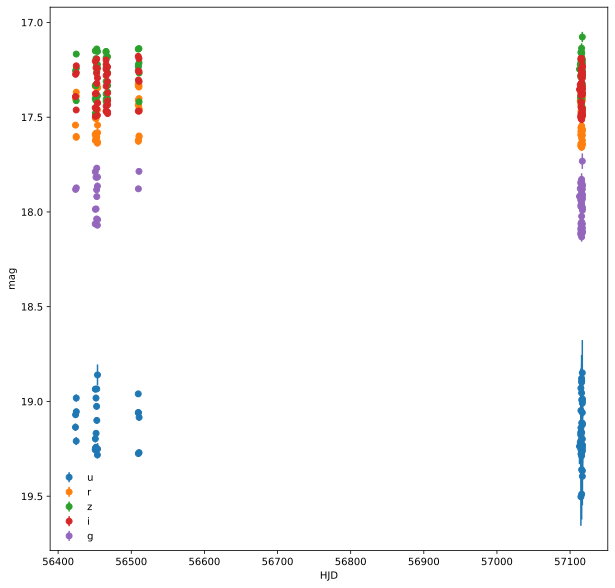

In [19]:
# PLOT THE DATA IN EACH PASSBAND - YOUR CODE HERE
fig , ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
for pb in set(filts):
    ind = (filts == pb)
    ax.errorbar(t[ind], y[ind], yerr=dy[ind], marker='o', ls='None', label=pb)
ax.legend(frameon=False)
ax.set_xlabel('HJD')
ax.set_ylabel('mag')
ax.invert_yaxis()
    

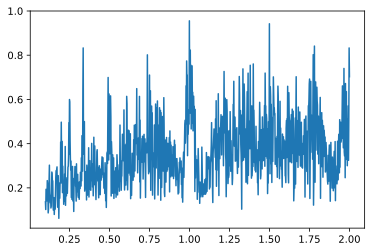

In [20]:
# YOUR CODE HERE

# You can set the number of terms in the Lomb-Scargle periodogram, either baseline or by band
model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
model.fit(t, y, dy, filts)

# CREATE A GRID OF PERIODS BETWEEN 0.1 - 2 days 
periods = np.linspace(0.1, 2, 1000)

# YOU CAN COMPUTE THE PERIODOGRAM WITH:
power = model.periodogram(periods)

# PLOT THE PERIODOGRAM
plt.plot(periods, power)

In [21]:
# YOU CAN SET THE RANGE FOR THE PERIOD SEARCH TO NARROW THINGS DOWN
model.optimizer.period_range = (0.2, 0.8)

# WITHIN THIS NARROW RANGE LOMB-SCARGLE CAN GIVE YOU THE BEST PERIOD
period = model.best_period

Finding optimal frequency:
 - Estimated peak width = 0.00906
 - Using 5 steps per peak; omega_step = 0.00181
 - User-specified period range:  0.2 to 0.8
 - Computing periods at 12999 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps


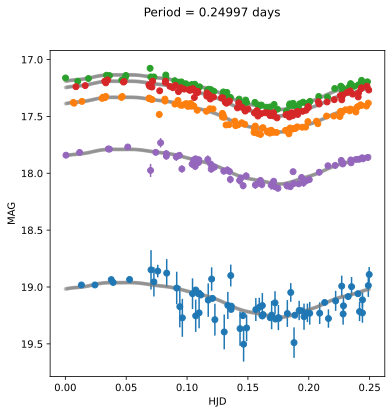

In [22]:
# RUN THIS TO LOOK AT YOUR FOLDED LIGHT CURVE
tfit = np.linspace(0, period, 1000)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,6))
for pb in set(filts):
    pfilt = [pb,]*len(tfit)
    yfit = model.predict(tfit, filts=pfilt)
    ax.plot(tfit, yfit, linestyle='-', marker='.', color='grey', alpha=0.1)
    ind = (filts == pb)
    ax.errorbar(t[ind]%period, y[ind], yerr=dy[ind], linestyle='None', marker='o')
ax.set_xlabel('HJD')  
ax.set_ylabel('MAG')
fig.suptitle(f'Period = {period:.5f} days')
ax.invert_yaxis()

# In-Class Exercise: Period analysis of a Synthetic Lightcurve

First, we need to generate a lightcurve to work with. The function below generates a series of timestamps t, and a sinusoidal signal y with noise dy added to it. We will use this lightcurve to test our functions. Note that our y values are generated with a sin function with a frequency of 2pi, or equiaveletly, a period of 1.

In [23]:
import numpy as np
from astropy.stats import LombScargle
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [24]:
cwd = os.getcwd()
data_dir = os.path.join(cwd, 'data')

Text(0, 0.5, 'Flux')

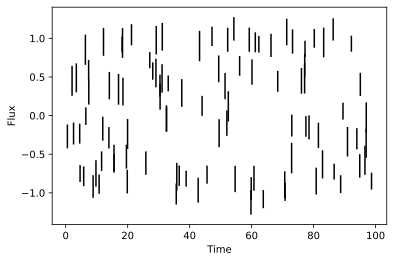

In [25]:
# "Generates a sample lightcurve with times t, magnitudes y, and errors dy

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi * t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

plt.errorbar(t,y,dy,ls='none',c='k')
plt.xlabel('Time')
plt.ylabel('Flux')


As you can see, this lightcurve is not very interesting when we plot it. This is where we need to use period finding analysis to learn more. Below, we try plotting the function in a new way--phase folding it. When we do this, we assume a period, and compute what phase each timestamps corresponds to between 0 and 1, assuming that period. Below, we try folding our lightcurve with the period equal to 1.

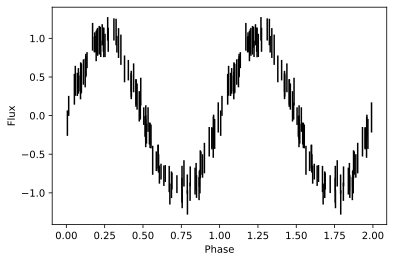

In [26]:
# "this function takes times t, mags y, and errors dy, and a period and phase folds the lightcurve at this period

def phase_fold(t,y,dy,period):
    phases=np.remainder(t,period)/period
    phases=np.concatenate((phases,phases+1))
    y=np.concatenate((y,y))
    dy=np.concatenate((dy,dy))
    plt.errorbar(phases,y,dy,ls='none',c='k')
    plt.xlabel('Phase')
    plt.ylabel('Flux')
    
phase_fold(t,y,dy,1)

Phase-folding can be used as a rudimentary method of period determination.  One may make educated guesses about the period of the phenomenon and phase-fold the lightcurve to see if a repeating pattern emerges.  Try this for this observations of the asteroid 1856 Ruzena, observed by non-Astronomy majors from the University of Maryland in April 2018 along with collaborators in Malta.  Asteroids typically have rotation periods between 2 and 12 hours.

The code below plots the raw, or unphased lightcurve, for all four nights of observations of the asteroid.

Text(0, 0.5, 'Differential Magnitude')

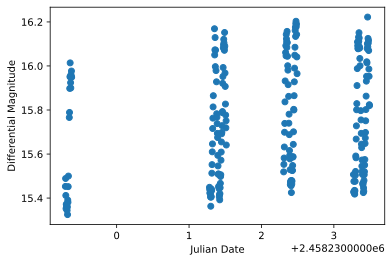

In [27]:
data=np.loadtxt(os.path.join(data_dir,'asteroid1.csv'),delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]
plt.plot(t,y,ls='none',marker="o")
plt.xlabel('Julian Date')
plt.ylabel('Differential Magnitude')


Why does the plot above show four vertical strings of points?  Each vertical "string" of points is one night of observations.  Compared to the entire period of time along the x-axis, each night is a very small length of time.  If you alter the code in the cell and change the limits on the x axis, you, can view each night of data individually.  (This will help you get an idea of the length of the asteroid's rotation period, so this is an especially useful exercise.)

It's not unusual for astronomers to have large gaps in lightcurves due to daytime and longer periods of time when observations were not able to be made (i.e., weather, length of observing cycles).  Phase-folding, or phasing, the lightcurve to trial periods allows one to remove these gaps and visualize the data more easily.

Below, you will try phasing the data for 1856 Ruzena to trial periods to see if you can determine the asteroid's rotation period by the trial-and error method.  Don't spend more than 5 minutes trying different test periods - you could do this all day and never get lucky with the correct period, since you'll need several decimal places of precision.  (The students from the class published the rotation periods to 4 decimal places of precision using only these data.)

Also, consider carefully:  when you have correctly determined the asteroid's rotation period and have a phased lightcurve, how many maxima and minima should it have in one complete phase?

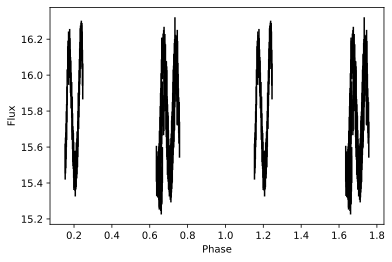

In [28]:
# create a dy array with error bars of 0.1 to pass to your phase fold function
dy = 0.1*np.ones(y.shape)
#period in units of days
period=2.0
    
phase_fold(t,y,dy,period)

From your experience with the trial-and-error method above, you can see that a better method of finding test periods is needed.  This is where the Lomb-Scargle Periodogram method is used.  This method essentially measures how much power is present at each frequency within the data: more power at a certain frequency should indicate a repeating signal within the data.  However, that signal could be from a physical phenomenon, such as a pulsating star or rotating asteroid, or it could be an artifact, such as the day/night cycle or other artificial frequencies caused by the observing process.  The astronomer must interpret the data to make a final decision.

In this case, we know that the period is 1 day; usually one does not know this ahead of time, and so we will use the LS Periodogram to tell us this.

Use the LombScargleMultiband function to compute the power spectrum (which shows us the relative strength of signals at different frequencies (frequency = 1/period).  You should see a large spike at period = 1.  Try changing the value of the period and watch the periodogram (the power spectrum graph) change.

(0.0, 2.0)

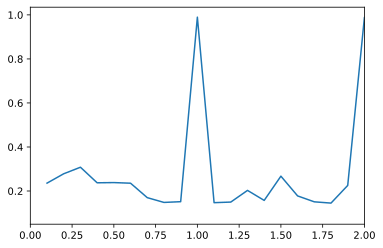

In [29]:
period=1

rand = np.random.RandomState(42)
t = 100 * rand.rand(100)
y = np.sin(2 * np.pi /period* t) + 0.1 * rand.randn(100)
dy = 0.1 * (1 + rand.rand(100))

# YOUR CODE HERE

# You can set the number of terms in the Lomb-Scargle periodogram, either baseline or by band
model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
model.fit(t, y, dy)

# CREATE A GRID OF PERIODS BETWEEN 0.1 - 100 days 
periods = np.linspace(0.1, 100, 1000)

# YOU CAN COMPUTE THE PERIODOGRAM WITH:
power = model.periodogram(periods)

# PLOT THE PERIODOGRAM
plt.plot(periods, power)
plt.xlim([0,2])

Now determine the frequency with the most power to find the best period to represent the signal in the data. Use your phase-folding code to plot the phase-folded data with the best period.

Finding optimal frequency:
 - Estimated peak width = 0.064
 - Using 5 steps per peak; omega_step = 0.0128
 - User-specified period range:  0.1 to 10
 - Computing periods at 4859 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


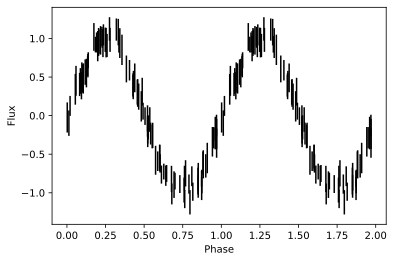

In [30]:
def lomb_scargle(t,y,dy):

    model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
    model.optimizer.period_range=(0.1, 10)
    model.fit(t, y, dy)
    
    return model.best_period

def plot_best_period(t,y,dy):
    phase_fold(t,y,dy,lomb_scargle(t,y,dy))

plot_best_period(t,y,dy)

# In-Class Exercise: Period analysis of a real Lightcurve

Let us apply the Lomb-Scargle Periodogram to real data.  First, let's take a look at unphased Cepheid data using the code below. (These data are from the American Association of Variable Star Observers.)   Please fill in the code block below to plot the unphased data. Notice how these data span a very long time period.  You may alter the code block in order to examine shorter time periods.  Do you have an educated guess about the period of this Cepheid?

Text(0, 0.5, 'V Magnitude')

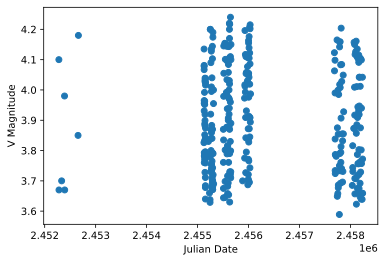

In [31]:
data=np.loadtxt(os.path.join(data_dir,'cepheid.csv'),delimiter=',',skiprows=1)
t=data[:,0]
y=data[:,1]
plt.plot(t,y,ls='none', marker="o")
plt.xlabel('Julian Date')
plt.ylabel('V Magnitude')

Now apply your LS algorithm to the Cepheid data.  

Finding optimal frequency:
 - Estimated peak width = 0.00105
 - Using 5 steps per peak; omega_step = 0.000211
 - User-specified period range:  0.1 to 10
 - Computing periods at 295022 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


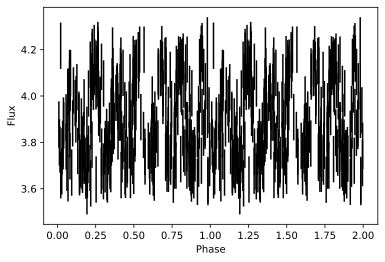

In [32]:
# Assume sensible error bars for data
dy = 0.1 * np.ones(y.shape)

plot_best_period(t,y,dy)

# In-Class Exercise: Lomb-Scargle Performance

Since Lomb-Scargle is one of the main time series analysis techniques in astronomy, we want to assess its performance as a function of signal-to-noise, time series sampling, and waveform shape. It is often worth investigating the performance of algorithms in terms of toy data sets to get an understanding of what the limitations may be. So:

1) Write a routine to generate a periodic sinusoidal time series at a period of $per$, containing $n$ datapoints, assuming homoscedastic Gaussian errors given by a standard deviation sigma, with a mean sample time of $meandt$ and standard deviation of $stddt$.

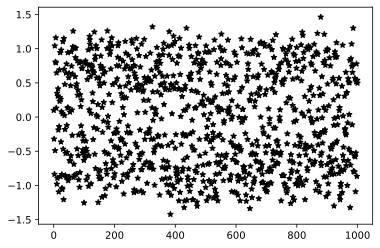

In [33]:
def getTimeSeries(per, n, sigma, meandt, stddt):
    # YOUR CODE HERE
    
    rand = np.random.RandomState(42)
    t = np.zeros(n)
    for i in range(len(t)):
        if i != 0:
            t[i] += t[i-1] + np.abs(np.random.normal(meandt,stddt,1)) 
            
    y = np.sin(2 * np.pi / per * t) + sigma*rand.randn(n)
    
    return t, y
    
t, y = getTimeSeries(0.1, 1000, 0.2, 1.0, 0.2)

plt.plot(t, y, 'k*')

2) Apply LombScargle to recover the period and then plot the corresponding periodogram, and the phase folded time series.

Finding optimal frequency:
 - Estimated peak width = 0.00629
 - Using 5 steps per peak; omega_step = 0.00126
 - User-specified period range:  0.1 to 10
 - Computing periods at 49482 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps


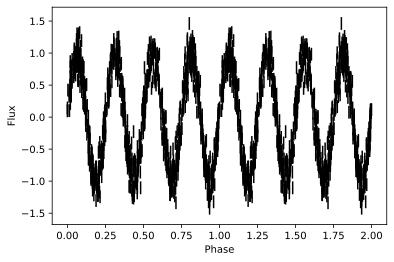

In [34]:
plot_best_period(t,y,0.1*np.ones(y.shape))

3) For a range of periods extending over three decades, e.g., $\log_{10}(per) = -1 - 2$, generate 10 time series and determine how accurate (how many period found by Lomb-Scargle are within 1\% of the known periods) Lomb-Scargle are.

You might consider repeating this test as (a) a function of number of data points in the time series, i.e., plot LS accuracy againts $n$, (b) a range of error values ($sigma$), and (c) different sample times.

In [35]:
def lomb_scargle(t,y,dy):

    model = LombScargleMultiband(Nterms_base=9, Nterms_band=0)
    model.optimizer.period_range=(0.1, 100)
    model.fit(t, y, dy)
    
    return model.best_period

N = 10
periods = 10 ** (np.random.rand(N)*3 - 1)

for period in periods:
    t, y = getTimeSeries(period, 1000, 0.2, 1.0, 0.2)
    perLS = lomb_scargle(t,y,0.1*np.ones(y.shape))
    print(period,perLS)

Finding optimal frequency:
 - Estimated peak width = 0.00624
 - Using 5 steps per peak; omega_step = 0.00125
 - User-specified period range:  0.1 to 1e+02
 - Computing periods at 50304 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 995 steps
2.663253329294907 2.663244985199227
Finding optimal frequency:
 - Estimated peak width = 0.00632
 - Using 5 steps per peak; omega_step = 0.00126
 - User-specified period range:  0.1 to 1e+02
 - Computing periods at 49669 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
8.352259399360364 33.40845166414243
Finding optimal frequency:
 - Estimated peak width = 0.00633
 - Using 5 steps per peak; omega_step = 0.00127
 - User-specified period range:  0.1 to 1e+02
 - Computing periods at 49591 steps
Zooming-in on 5 candidate peaks:
 - Computing periods at 1000 steps
22.143310159700665 88.57949517152875
Finding optimal frequency:
 - Estimated peak width = 0.00628
 - Using 5 steps per peak; omega_step = 0.00126
 - Use

# APPENDIX: Challenge Problem

The above data sets were relatively straightfoward to work with using the Lomb-Scargle Periodogram because the data were rather "clean" and did not exhibit much power at alternative frequencies.  You can find two additional data sets in the data directory for this module.  One is "asteroid2", which is for the asteroid 4404 Enirac observed by students at the University of Maryland in Spring 2017.  The other is "delta-scuti", which is for a Delta Scuti-type variable star.  You will find that both of these objects have very "messy" periodograms, in which is its unclear what the "best" period is.  You can study each of these objects by looking at subsets of the data (and running LS on the subsets), potentially temporarily eliminating data points which are outliers, and otherwise being clever in your analysis.  You can begin your analysis in the space below.